Homework 4 -  Descriptive statistics UK child height/weight measurements data 

Task 2


In [96]:
dat = read.csv("ncmp_1415_final_non_disclosive.csv",header=TRUE,sep=",")

In [97]:
set.seed(123)

In [98]:
head(dat)

ncmppseudosystemid genderdescription ageinmonths schoolyear height
1                  1            Female       121.1          6  132.0
2                  2              Male        56.2          R  112.6
3                  3              Male       130.1          6  149.0
4                  4            Female       125.8          6  142.9
5                  5            Female       127.0          6  146.5
6                  6            Female        52.2          R  104.0
  heightzscore heightpscore weight weightzscore weightpscore      bmi
1 -1.081641685     0.139706   29.7  -0.53420281     0.296601 17.04545
2  1.195667364     0.884087   19.8   0.80325173     0.789085 15.61667
3  0.972690386     0.834646   71.0   3.03416472     0.998794 31.98054
4  0.256078452     0.601055   41.6   1.00509355     0.842574 20.37178
5  0.709974496     0.761140   35.0   0.08697797     0.534655 16.30770
6 -0.008924353     0.496440   16.6  -0.14767286     0.441300 15.34763
    bmizscore bmipscore bmipopulationcategory bmiclinicalcategory
1  0.04626822  0.518452        healthy weight      healthy weight
2  0.02014162  0.508035        healthy weight      healthy weight
3  3.36512464  0.999617       very overweight     very overweight
4  1.20525665  0.885948            overweight      healthy weight
5 -0.44731679  0.327323        healthy weight      healthy weight
6 -0.17422553  0.430844        healthy weight      healthy weight
  schooltier1localauthority schooltier2localauthority
1                 E06000032                 E06000032
2                 E10000027                 E07000187
3                 E06000032                 E06000032
4                 E08000006                 E08000006
5                 E10000030                 E07000207
6                 E08000010                 E08000010
  schoolgovernmentofficeregion schoolindexofmultipledepriv
1                    E12000006                           5
2                    E12000009                           5
3                    E12000006                           7
4                    E12000002                           7
5                    E12000008                           8
6                    E12000002                           3
  pupilschooldistancebanded suppress_record_high suppress_record_low
1           A Up to 0.5 kms                                         
2        C >= 1 but < 2 kms                                         
3        C >= 1 but < 2 kms                                         
4       B >= 0.5 but < 1 km                                         
5           A Up to 0.5 kms                                         
6           A Up to 0.5 kms                                         
  suppress_table suppress_imd
1                            
2                            
3                            
4                            
5                            
6

Some data pre-processing - get rid of negative values, etc.


In [99]:
dim(dat)

[1] 1141859      24

In [100]:
dat = dat[(dat$height > 0 & dat$weight > 0 & dat$bmi > 0),]

In [101]:
dim(dat)

[1] 1138387      24

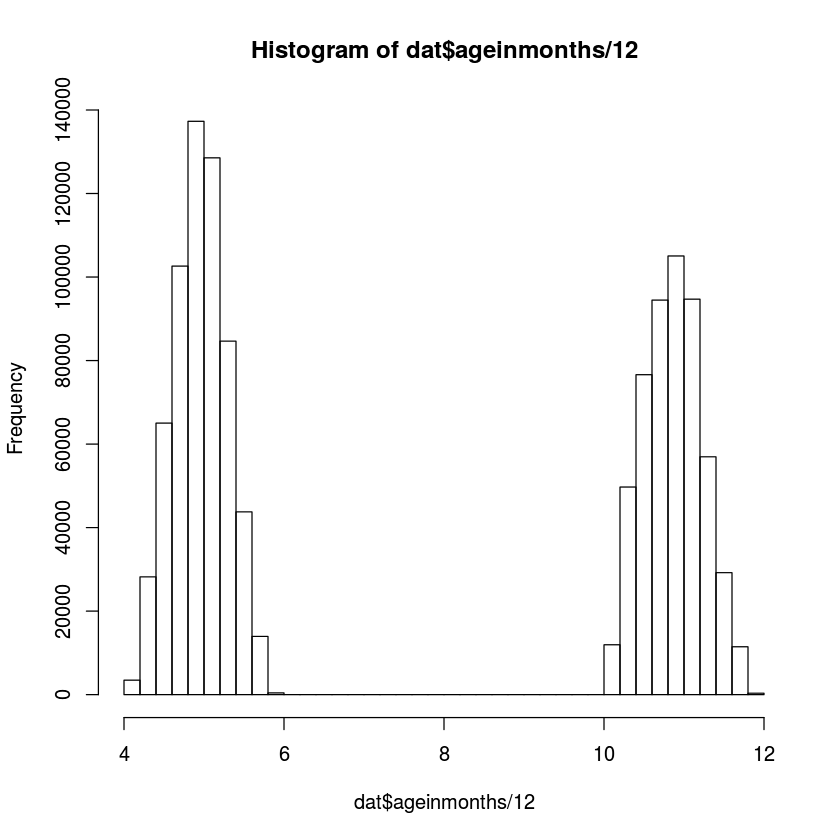

In [102]:
hist(dat$ageinmonths / 12,breaks = 50)

In [103]:
dat$age = dat$ageinmonths / 12
dat$agegroup = as.factor(ifelse(dat$age >= 4 & dat$age <=6, "1", "2"))

In [104]:
dat = dat[,c("genderdescription","age","agegroup","height","weight","bmi","bmipopulationcategory")]

select 0.2% of data -- just for the faster loading (not enough for the meaningful analysis)

In [105]:
ids = sample(1:nrow(dat),round(0.002*nrow(dat)),replace = FALSE)

In [106]:
dat = dat[ids,]

In [107]:
dim(dat)

[1] 2277    7

In [108]:
dat$age.x.gender = as.factor(mapply(paste0, dat$agegroup, dat$genderdescr))


In [109]:
dat$bmicat.agegroup = as.factor(mapply(paste0, dat$bmipopulationcategory, dat$agegroup))

In [110]:
library(ggplot2)

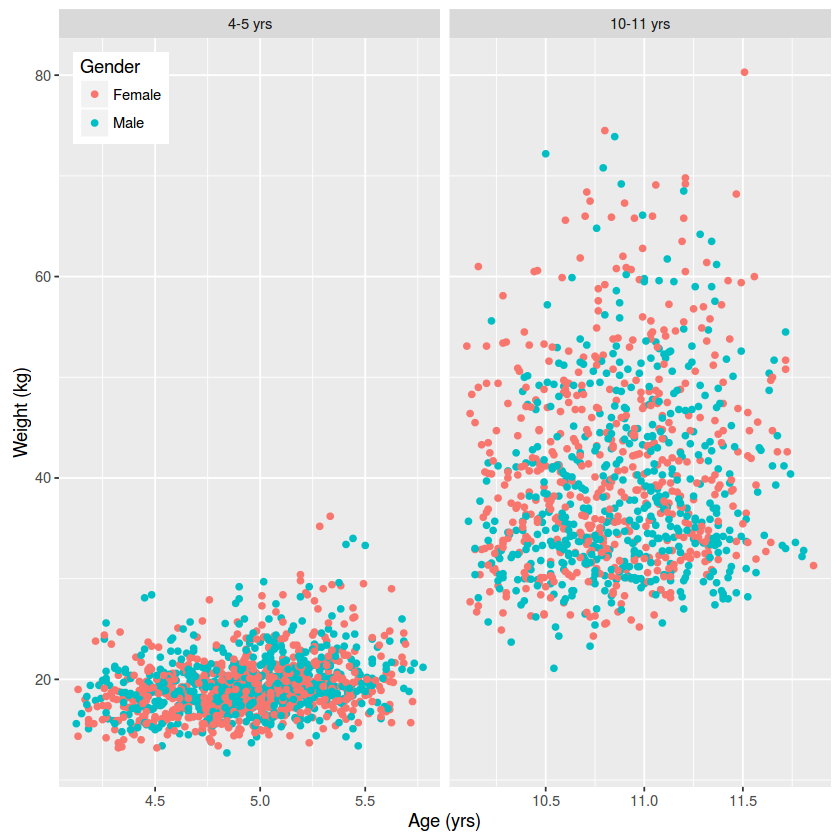

In [111]:
ggplot(dat) + geom_point(aes(x = age, y = weight,color = genderdescription)) +
facet_wrap(~agegroup, scales = "free_x",labeller = labeller(agegroup =  c('1'= "4-5 yrs", '2' = "10-11 yrs"))) +
scale_color_discrete("Gender") + xlab("Age (yrs)") + ylab("Weight (kg)") + 
theme(legend.justification = c(0, 1),legend.position = c(0,1))


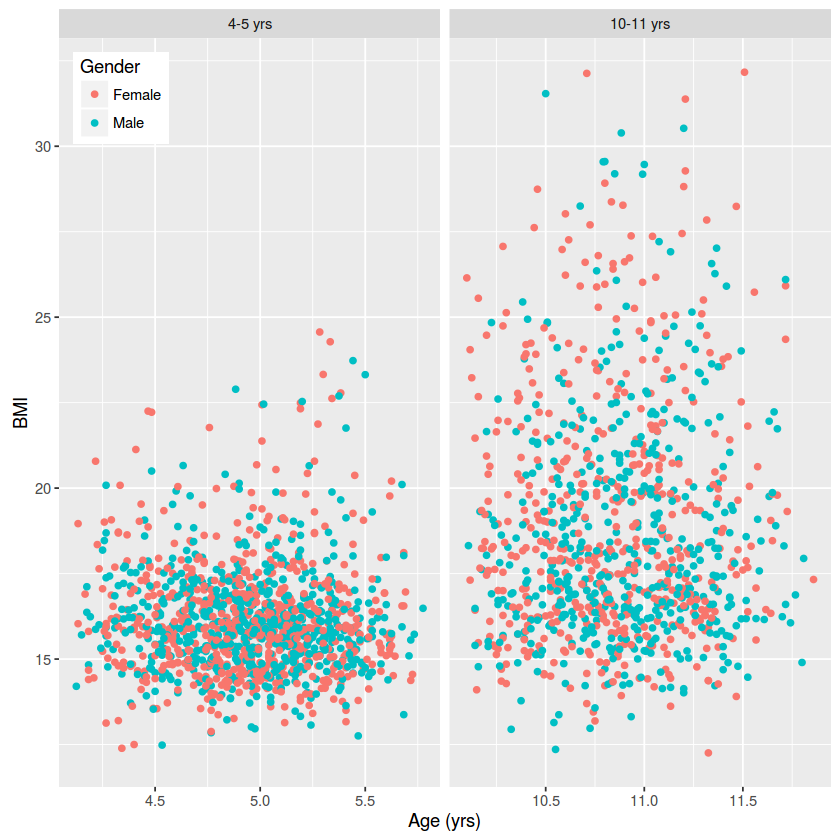

In [112]:
ggplot(dat) + geom_point(aes(x = age, y = bmi, color = genderdescription)) +
facet_wrap( ~agegroup, scales = "free_x", labeller = labeller(agegroup = c('1'= "4-5 yrs", '2' = "10-11 yrs"))) +
scale_color_discrete("Gender") + xlab("Age (yrs)") + 
ylab("BMI") + theme(legend.justification = c(0, 1),legend.position = c(0,1))


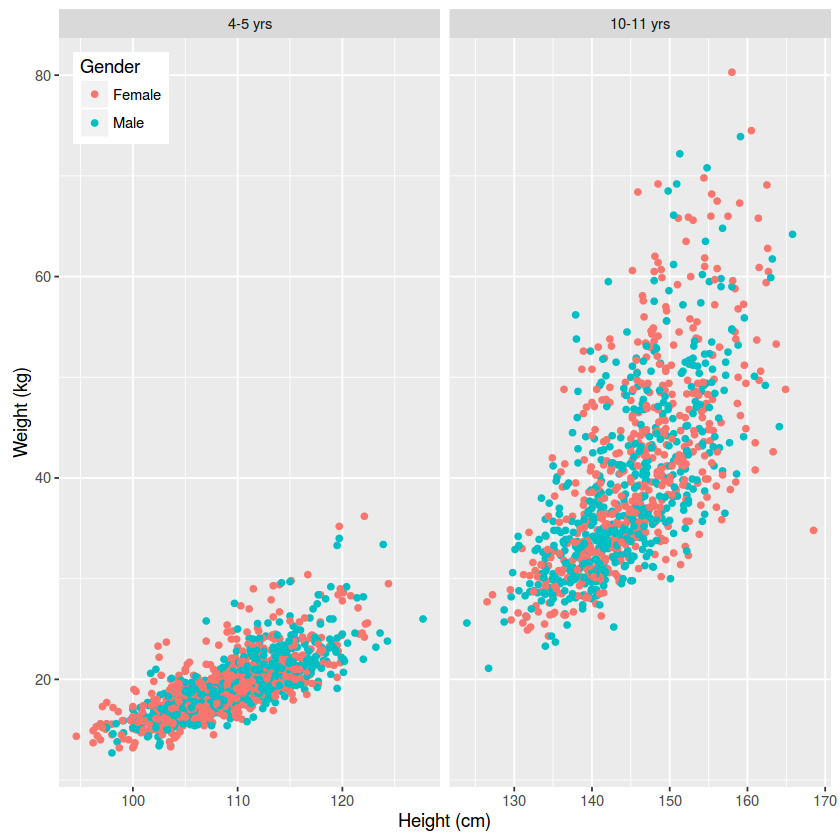

In [113]:
ggplot(dat) + geom_point(aes(x = height, y = weight,color = genderdescription)) +
facet_wrap(~agegroup, scales = "free_x",labeller = labeller(agegroup = c('1'= "4-5 yrs", '2' = "10-11 yrs")))+
scale_color_discrete("Gender") + xlab("Height (cm)") + ylab("Weight (kg)") +
theme(legend.justification = c(0, 1),legend.position = c(0,1))

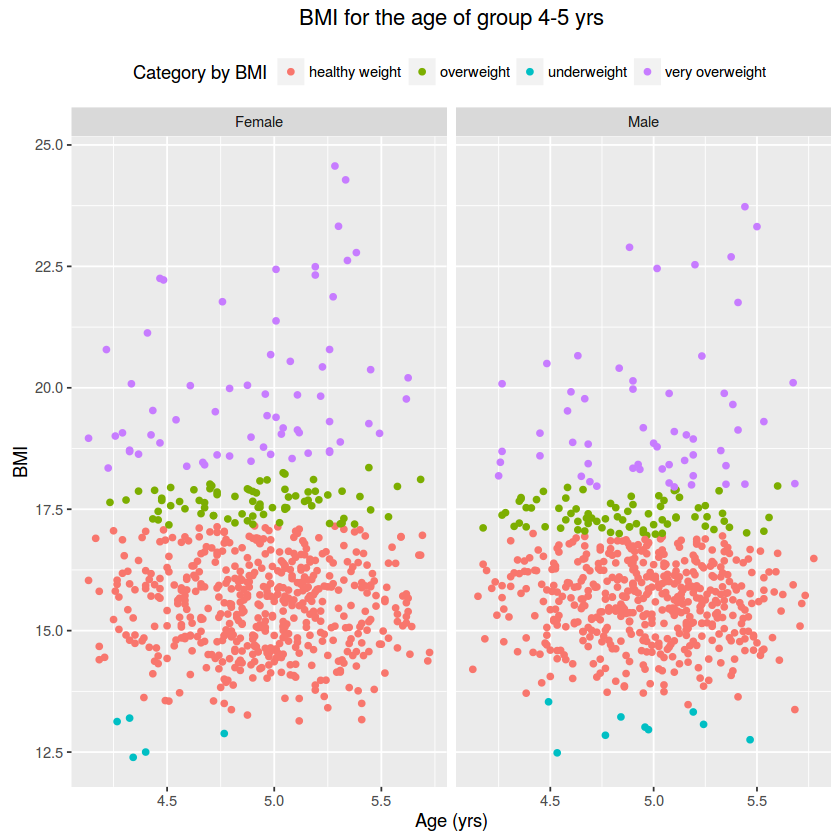

In [114]:
ggplot(subset(dat, agegroup == "1")) + geom_point(aes(x = age, y = bmi,color = bmipopulationcategory)) +
facet_wrap(~genderdescription, scales = "free_x") + scale_color_discrete("Category by BMI") +
xlab("Age (yrs)") + ylab("BMI") + theme(legend.position = "top") + ggtitle("BMI for the age of group 4-5 yrs")



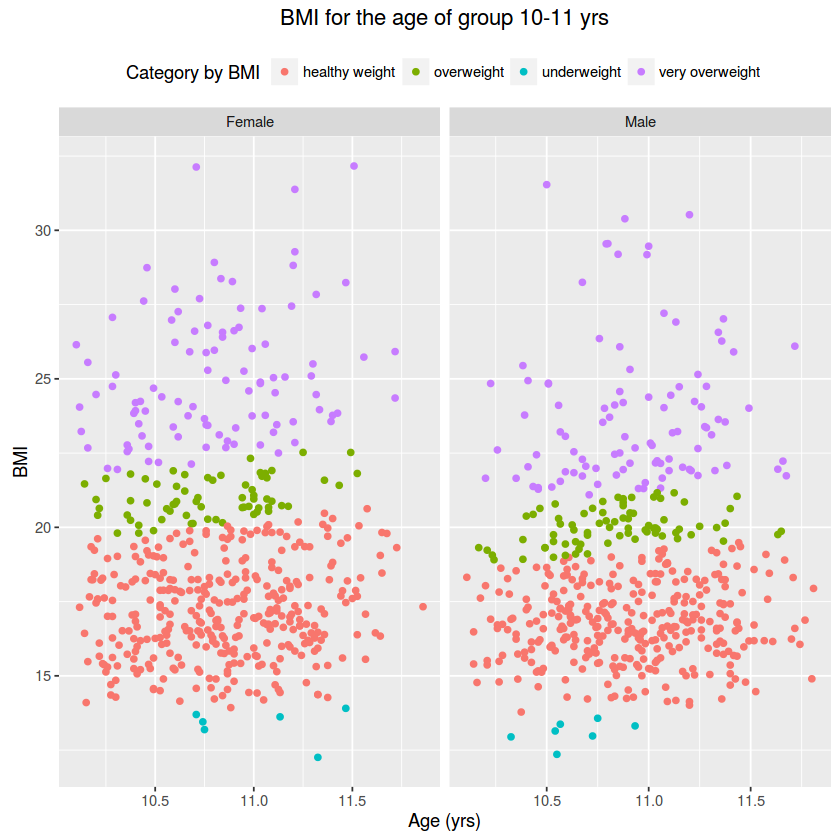

In [115]:
ggplot(subset(dat, agegroup == "2")) + geom_point(aes(x = age, y = bmi,color = bmipopulationcategory)) +
facet_wrap(~genderdescription, scales = "free_x") + scale_color_discrete("Category by BMI") +
xlab("Age (yrs)") + ylab("BMI") + theme(legend.position = "top") + ggtitle("BMI for the age of group 10-11 yrs")

TASK 3 -Derive new features to plot

In [116]:
dat$height.x.weight = dat$height * dat$weight
dat$height.d.weight = dat$height / dat$weight
bsa = function(w, h) 0.007184 * w^0.425 * h^0.725
dat$bsa = mapply(bsa, dat$weight, dat$height)


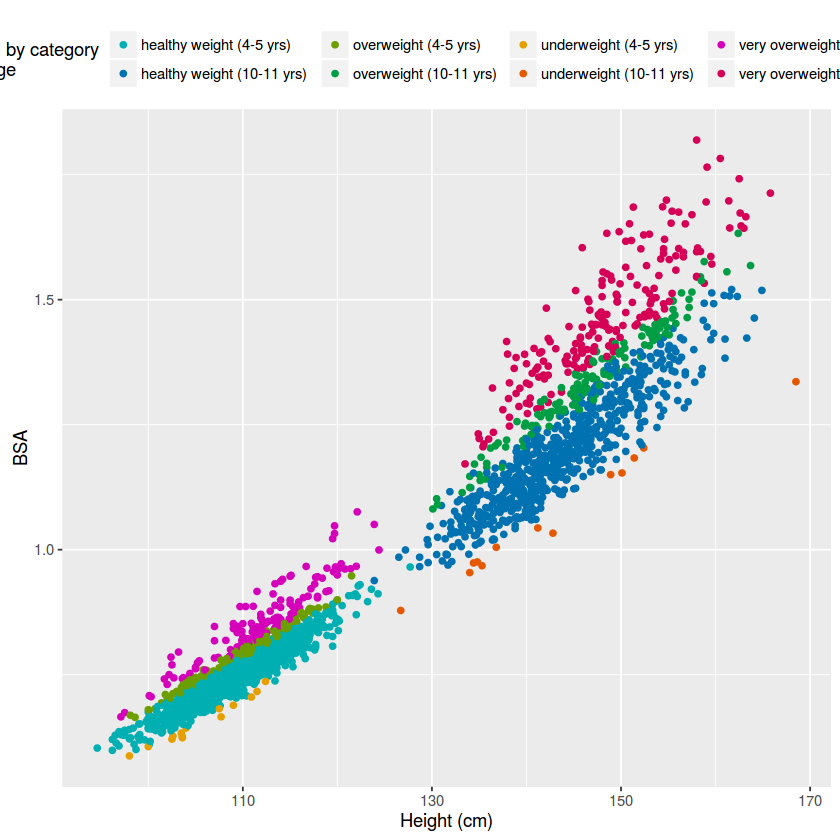

In [117]:
ggplot(dat) + geom_point(aes(x = height, y = bsa, color = bmicat.agegroup)) +
scale_color_manual(values = c("#00AFB2", "#0072B2", "#6C9E00", "#009E44","#E69F00", "#E65800", "#D500B9", "#D50055"),
name = "BMI by category\n& age",labels = c("healthy weight (4-5 yrs)",
"healthy weight (10-11 yrs)",
"overweight (4-5 yrs)", "overweight (10-11 yrs)",
"underweight (4-5 yrs)", "underweight (10-11 yrs)",
"very overweight (4-5 yrs)",
"very overweight (10-11 yrs)")) +
theme(legend.position = "top") +
xlab("Height (cm)") +
ylab("BSA")


now repeat it for Weight vs BSA, BMI vs BSA, and so on

TASK 4 - Normalization/standardization

In [118]:
normalize <- function (x) {
x$normheight <- (x$height - mean(x$height)) / sd(x$height)
x$normweight <- (x$weight - mean(x$weight)) / sd(x$weight)
x
}

In [119]:
tmp <- by(dat, list(dat$genderdescription, dat$age), normalize)
normalized <- do.call('rbind', tmp)

In [120]:
NB = length(levels(normalized$bmipopulationcategory))
NG = length(levels(normalized$genderdescription))

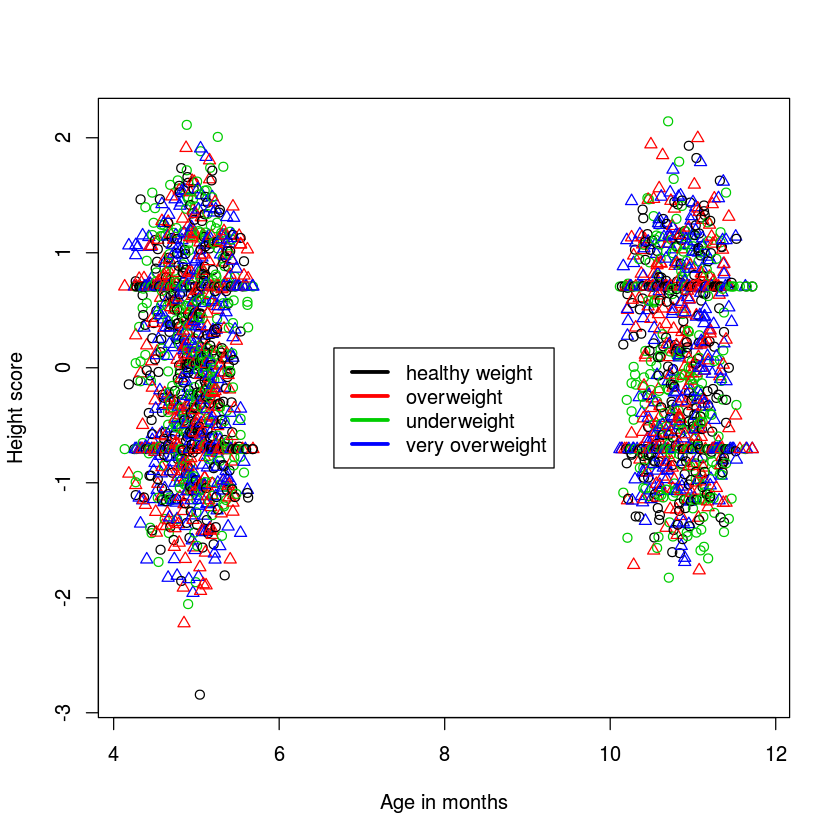

In [126]:
plot(normalized$age, normalized$normheight, xlab='Age in months', ylab='Height score',
col = 1:NB,pch = 1:NG)
legend('center', legend = levels(normalized$bmipopulationcategory), col = 1:NB, lwd = 3)

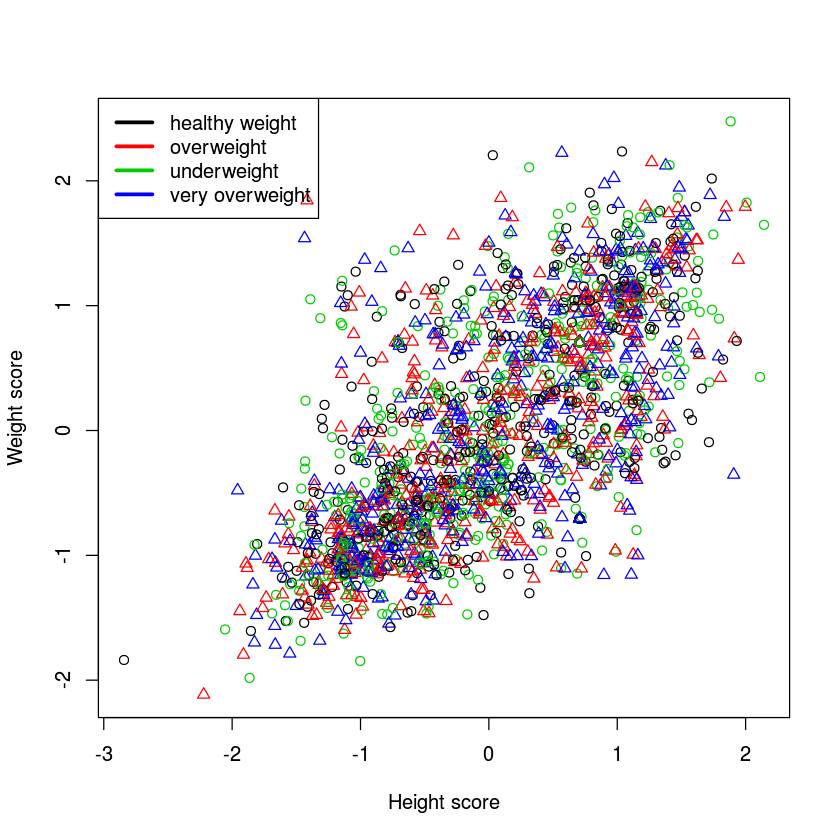

In [122]:
plot(normalized$normheight, normalized$normweight, xlab='Height score', ylab='Weight score',
col = 1:NB, pch = 1:NG)
legend('topleft', legend = levels(normalized$bmipopulationcategory), col = 1:NB, lwd = 3)

TASK 5 - Growth curves

In [123]:
library(reshape2)

In [124]:
dat_younger = subset(dat, agegroup == "1")
dat_older = subset(dat, agegroup == "2")
dat_younger$bmi.decile = with(dat_younger, cut(bmi,
breaks = quantile(bmi, probs = seq(0, 1, by = 0.1)),
include.lowest = T))
dat_older$bmi.decile = with(dat_older, cut(bmi,
breaks = stats::quantile(bmi, probs = seq(0, 1, by = 0.1)),
include.lowest = T))
dat_younger_melt = reshape2::melt(dat_younger, measure.vars = "bmi.decile")
dat_older_melt = reshape2::melt(dat_older, measure.vars = "bmi.decile")


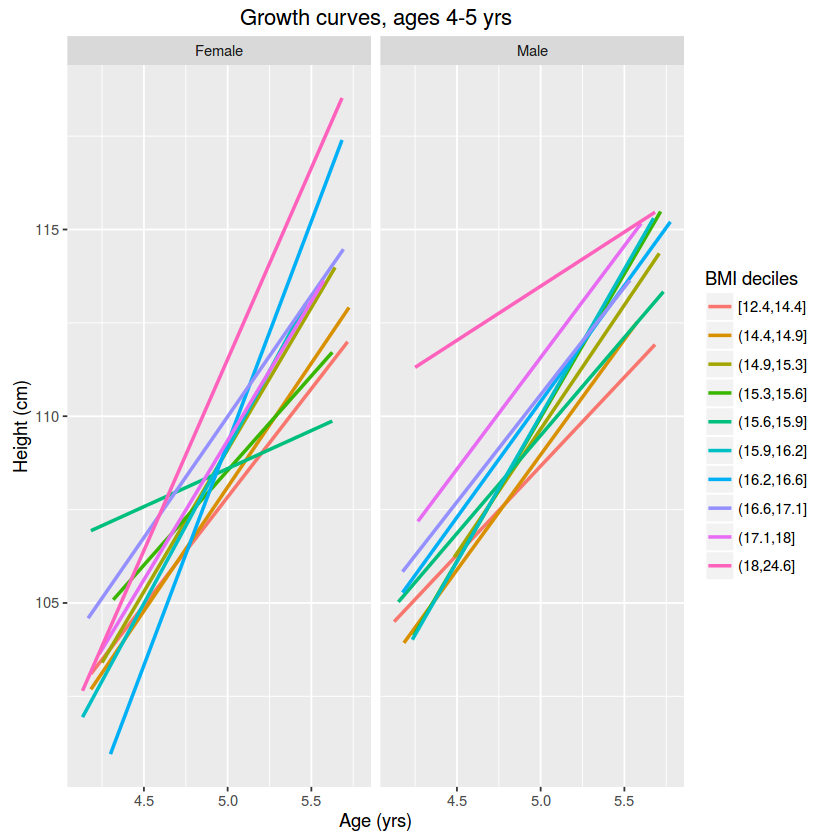

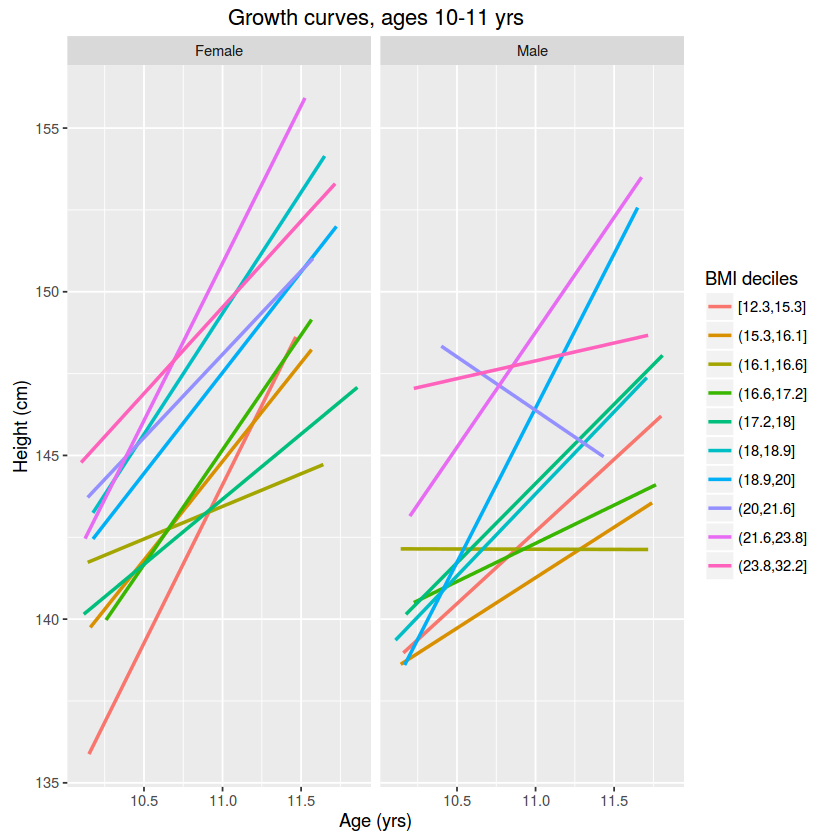

In [125]:
ggplot(data = dat_younger,aes(x = age, y = height, color = bmi.decile)) +
geom_smooth(method = "lm", formula = y ~ x, se = F) + facet_wrap(~genderdescription) +
ggtitle("Growth curves, ages 4-5 yrs") + xlab("Age (yrs)") +
ylab("Height (cm)") + scale_color_discrete("BMI deciles")

ggplot(data = dat_older,aes(x = age, y = height, color = bmi.decile)) +
geom_smooth(method = "lm", formula = y ~ x, se = F) + facet_wrap(~genderdescription) +
ggtitle("Growth curves, ages 10-11 yrs") +
xlab("Age (yrs)") + ylab("Height (cm)") +
scale_color_discrete("BMI deciles")